In [1]:
### Import Functions
from DirectFunctions import import_fx_data, plot_forex, direct_daily_rets, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics


In [2]:
### Call Function to Load in Rate Data
forex_pairs = ['USDJPY=X', 'CADCHF=X']
start_date = '2023-07-01'
forex_data = import_fx_data(forex_pairs, start_date)
forex_data.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,USDJPY=X,CADCHF=X
257,2024-06-26,159.686005,0.65529
258,2024-06-27,160.621002,0.65410
259,2024-06-28,160.686996,0.65585
260,2024-07-01,160.906998,0.65839
261,2024-07-02,161.617004,0.65739


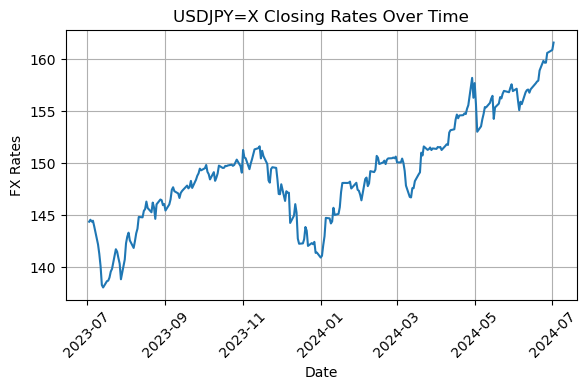

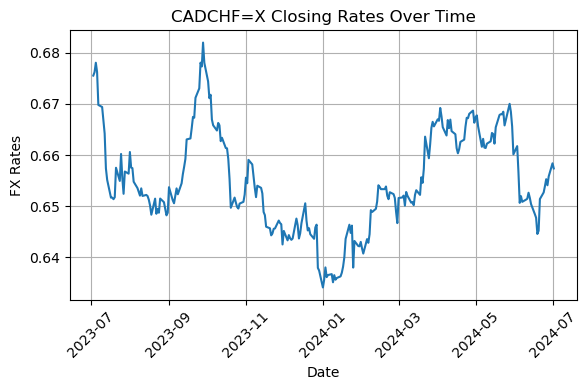

In [3]:
### Plot FX Pairs
plot_forex(forex_data, forex_pairs)


In [4]:
### Call Function to Calculate Daily Returns
daily_returns = direct_daily_rets(forex_data)
print(daily_returns.head())


        Date  USDJPY=X  CADCHF=X
0 2023-07-04  0.001288  0.000992
1 2023-07-05 -0.001231  0.002721
2 2023-07-06  0.000575 -0.002684
3 2023-07-07 -0.003723 -0.009509
4 2023-07-10 -0.012101 -0.000597


In [5]:
### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(forex_pairs, daily_returns)
print("Hedge Ratio:", hedge_ratio)


Hedge Ratio: 0.15268458068678142


In [6]:
### Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, forex_pairs, daily_returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))


Long Position Size:  1000
Short Position Size:  -152.6846
Recent Hedged Cumulative Returns:  256    1110.870090
257    1117.682502
258    1117.685155
259    1118.554500
260    1123.749550
dtype: float64
Recent Unhedged Cumulative Returns:  256    1105.874113
257    1112.349255
258    1112.806286
259    1114.329861
260    1119.246873
Name: USDJPY=X, dtype: float64


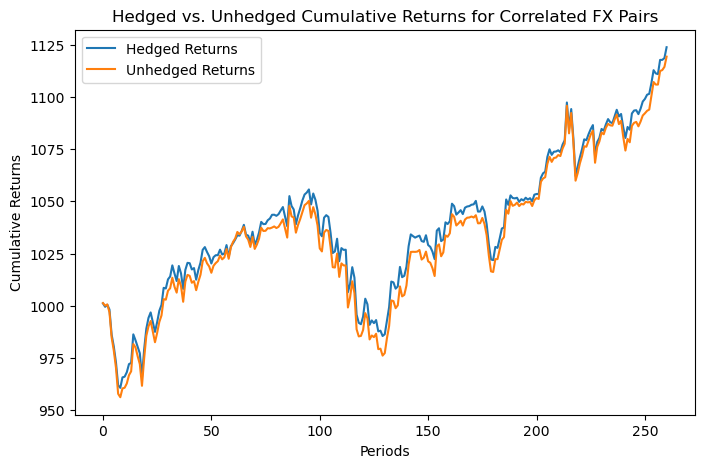

In [7]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [8]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, daily_returns)


Metric                                  Hedged        Unhedged
Total Returns                         123.7495        119.2469
Annualized Returns                    104.6238        100.9406
Mean Return                          1037.9935       1033.1576
Standard Deviation                     34.2533         34.8723
Sharpe Ratio                          481.0522        470.3126

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 481.0522,
which means for every unit of risk, the hedged portfolio is generating 481.0522 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 470.3126,
indicating that for every unit of risk, the unhedged portfolio is generating 470.3126 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
